<a href="https://colab.research.google.com/github/MALLI7622/Deep-Learning-with-PyTorch/blob/master/MPNeuronandPercetron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Dataset


In [0]:
import sklearn.datasets
import numpy as np

In [0]:
breast_cancer = sklearn.datasets.load_breast_cancer()


In [0]:
X = breast_cancer.data
Y = breast_cancer.target

In [4]:
print("Features: ", X,
      "\n Target: ", Y)

Features:  [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]] 
 Target:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 

In [5]:
print(X.shape, Y.shape)

(569, 30) (569,)


In [0]:
import pandas as pd


In [0]:
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

In [0]:
data['class'] = breast_cancer.target

In [9]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [11]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [12]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [13]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


# Test train split

In [0]:
from sklearn.model_selection import train_test_split


In [0]:
X = data.drop('class',axis = 1)

Y = data['class']

In [16]:
type(X)

pandas.core.frame.DataFrame

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (426, 30) (143, 30)


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1)

In [20]:
print(Y.mean(), Y_train.mean(), Y_test.mean())

0.6274165202108963 0.62890625 0.6140350877192983


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, stratify = Y)

In [22]:
print(X.mean(), X_train.mean(), X_test.mean())

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

# Binarisation of input


In [0]:
import matplotlib.pyplot as plt


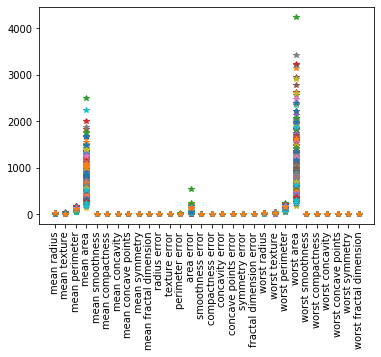

In [24]:
plt.plot(X_train.T, '*')
plt.xticks(rotation= 'vertical')
plt.show()

In [0]:
X_binarised_3_train = X_train['mean area'].map(lambda x: 0 if x < 1000 else 1)

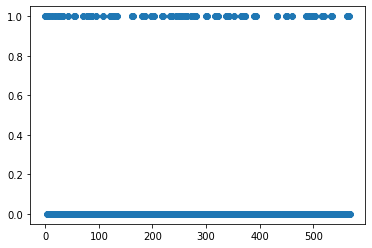

In [26]:
plt.plot(X_binarised_3_train, '8')

In [0]:
X_binarised_train = X_train.apply(pd.cut, bins = 2, labels= [1,0])

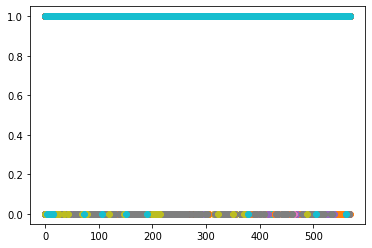

In [28]:
plt.plot(X_binarised_train,'8')
plt.show()

In [0]:
X_binarised_test = X_test.apply(pd.cut, bins = 2, labels= [1,0])

In [0]:
X_binarised_test = X_binarised_test.values
X_binarised_train = X_binarised_train.values


In [31]:
type(X_binarised_train)

numpy.ndarray

#MP neuron model

In [0]:
from random import randint

In [33]:
b = 3

i = randint(0, X_binarised_train.shape[0])

print('For row ',i)
if (np.sum(X_binarised_train[100, :]) >= b):
  print('MP Neuron inference is malignant')
else:
  print('MP Neuron inference is benign')

if (Y_train[i] == 1):
  print("MALI")
else:
  print("begign")

For row  241
MP Neuron inference is malignant
MALI


In [34]:
b = 3

Y_pred_train = []
accuracy_rows = 0
for x,y in zip(X_binarised_train,Y_train):
  Y_pred = (np.sum(x) >= b)
  Y_pred_train.append(Y_pred)
  accuracy_rows += (y==Y_pred)

print(accuracy_rows, accuracy_rows/X_binarised_train.shape[0])

321 0.626953125


In [35]:
for b in range(X_binarised_train.shape[1]+1):
  Y_pred_train = []
  accuracy_rows = 0
  for x,y in zip(X_binarised_train,Y_train):
    Y_pred = (np.sum(x) >= b)
    Y_pred_train.append(Y_pred)
    accuracy_rows += (y==Y_pred)

  print(b, accuracy_rows/X_binarised_train.shape[0])

0 0.626953125
1 0.626953125
2 0.626953125
3 0.626953125
4 0.626953125
5 0.626953125
6 0.626953125
7 0.626953125
8 0.626953125
9 0.626953125
10 0.626953125
11 0.626953125
12 0.626953125
13 0.630859375
14 0.634765625
15 0.634765625
16 0.642578125
17 0.65234375
18 0.66015625
19 0.6640625
20 0.677734375
21 0.689453125
22 0.708984375
23 0.732421875
24 0.76953125
25 0.80078125
26 0.83203125
27 0.85546875
28 0.85546875
29 0.81640625
30 0.736328125


In [0]:
from sklearn.metrics import accuracy_score

In [37]:
b = 21
Y_pred_test = []
accuracy_rows = 0
for x in X_binarised_test:
  Y_pred = (np.sum(x) >= b)
  Y_pred_test.append(Y_pred)
    
accuracy = accuracy_score(Y_pred_test, Y_test)
print(b, accuracy)

21 0.8596491228070176


#MP Neuron class

In [0]:
class MPNeuron:
  def __init__(self):
    self.b = None

  def model(self, x):
    return(sum(x) >= self.b)

  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
  def fit(self, X,Y):
    accuracy = {}
    for b in range(X.shape[1] + 1):
      self.b = b
      y_pred = self.predict(X)
      accuracy[b] = accuracy_score(y_pred, Y)

    best_b = max(accuracy, key = accuracy.get)
    self.b = best_b
    print('Optimal value of b is', best_b)
    print('Highest accuracy is', accuracy[best_b])

In [39]:
mp_neuron = MPNeuron()

mp_neuron.fit(X_binarised_train, Y_train)

Optimal value of b is 27
Highest accuracy is 0.85546875


In [40]:
type(Y_train)

pandas.core.series.Series

In [0]:
Y_test_pred = mp_neuron.predict(X_binarised_test)

accuracy_test = accuracy_score(Y_test_pred, Y_test)

In [42]:
print(accuracy_test)

0.7894736842105263


# Perceptron Class

In [0]:
class Percetron:
  def __init__(self):
    self.w = None
    self.b = None

  def model(self, x):
    return 1 if (np.dot(self.w,x) >= self.b) else 0

  def predict(self,X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self, X, Y, epochs = 1,lr = 1):
    self.w = np.ones(X.shape[1])
    self.b = 0
    accuracy = {}
    max_accuracy = 0
    wt_matrix = []
    for i in range(epochs):

      for x,y in zip(X,Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b + lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b - lr * 1
      wt_matrix.append(self.w)

      accuracy[i] = accuracy_score(self.predict(X),Y)
      if (accuracy[i] > max_accuracy ):
        max_accuracy = accuracy[i]
        ckptw = self.w
        ckptb = self.b
    self.w = ckptw
    self.b = ckptb
    accuracy = list(accuracy.values())
    print(max_accuracy)
    plt.plot(accuracy)
    plt.ylim([0, 1])
    plt.show()  
    return np.array(wt_matrix)

  

In [0]:
perceptron = Percetron()

0.921875


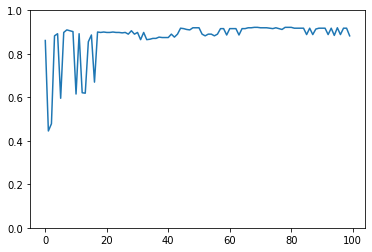

In [341]:
wt_matrix = perceptron.fit(X_train, Y_train, 100)

In [342]:
Y_pred_test = perceptron.predict(X_test)
print(accuracy_score(Y_pred_test, Y_test))

0.9473684210526315


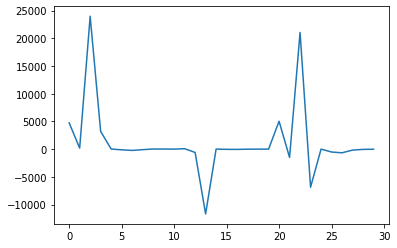

In [343]:
plt.plot(wt_matrix[-1,:])
plt.show()

In [0]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

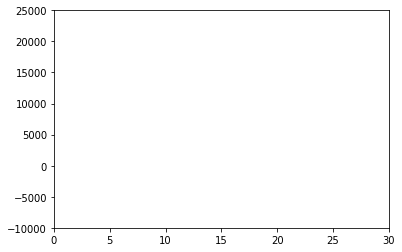

In [358]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, wt_matrix.shape[1]))
ax.set_ylim((-10000, 25000))

line, = ax.plot([], [], lw=2)


In [0]:
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i, :]
    line.set_data(x, y)
    return (line,)

In [0]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=100, interval=200, blit=True)

In [363]:
HTML(anim.to_html5_video())